Example 1: Making a GTC/triangle plot with pygtc
==========================

Import dependencies
------------------

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina' # For mac users with Retina display
from matplotlib import pyplot as plt
import numpy as np
import pygtc

Generate fake data
-----------------
Let's create two sets of fake sample points with 8 dimensions each. Note that chains are allowed to have different lengths.

In [2]:
# Create Npoints samples from random multivariate, nDim-dimensional Gaussian
def create_random_samples(nDim, Npoints):
    means = np.random.rand(nDim)
    cov = .5 - np.random.rand(nDim**2).reshape((nDim,nDim))
    cov = np.triu(cov)
    cov += cov.T - np.diag(cov.diagonal())
    cov = np.dot(cov,cov)
    samples =  np.random.multivariate_normal(means, cov, Npoints)
    return samples

# Create two sets of fake data with 8 parameters
np.random.seed(0) # To be able to create the same fake data over and over again
samples1 = create_random_samples(8, 50000)
samples2 = 1+create_random_samples(8, 70000)

Omit one parameter for one chain
------------------------------

Let's assume the samples1 does not include the second to last parameter. In the figure, we only want to show this parameter for samples2. pygtc will omit parameters that only contain nan.

In [3]:
samples1[:,6] = None

Minimal example
--------------

/Users/fcarter/Documents/Code/Python/pygtc/pygtc/pygtc.py:558: RuntimeWarning: All-NaN axis encountered
  for k in range(nChains)]), axis=0)
/Users/fcarter/Documents/Code/Python/pygtc/pygtc/pygtc.py:560: RuntimeWarning: All-NaN slice encountered
  for k in range(nChains)]), axis=0)


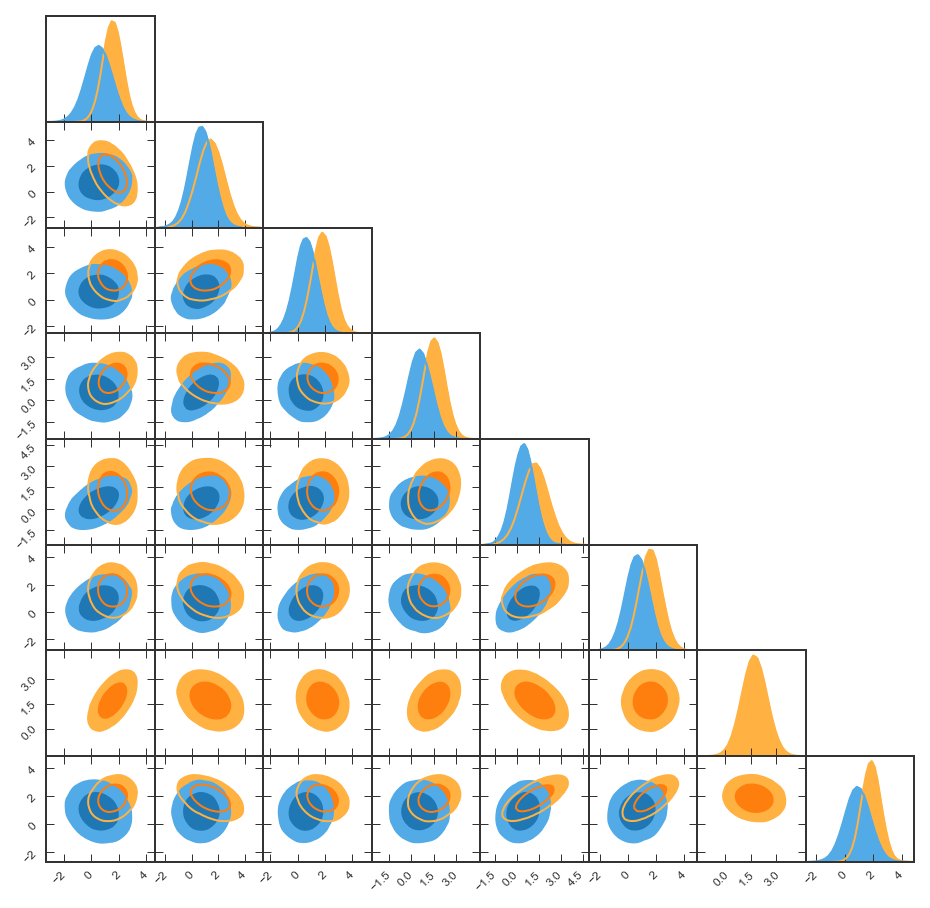

In [4]:
GTC = pygtc.plotGTC(chains=[samples1,samples2])

Complete the figure
------------------
Now let's add:
* axis and data labels
* lines marking some important points in parameter space
* Gaussian distributions on the 1d histograms that could indicate Gaussian priors we assumed

Note that all these must match number of parameters!

/Users/fcarter/Documents/Code/Python/pygtc/pygtc/pygtc.py:558: RuntimeWarning: All-NaN axis encountered
  for k in range(nChains)]), axis=0)
/Users/fcarter/Documents/Code/Python/pygtc/pygtc/pygtc.py:560: RuntimeWarning: All-NaN slice encountered
  for k in range(nChains)]), axis=0)


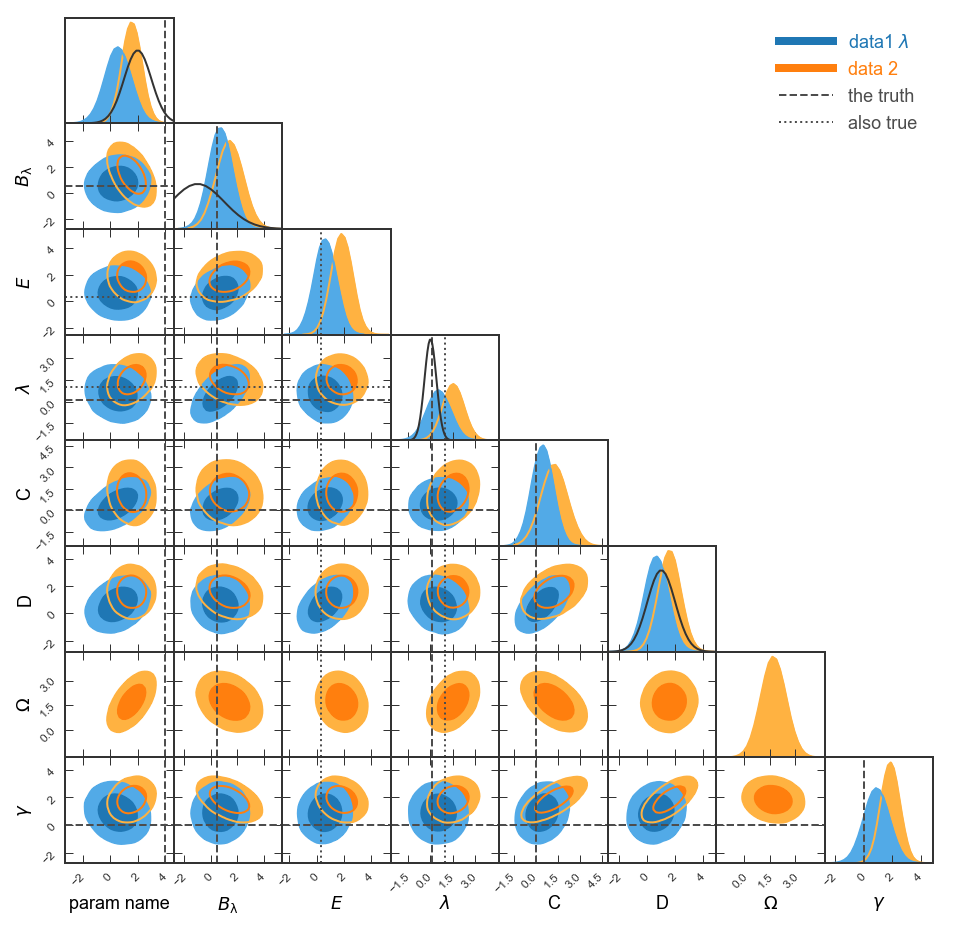

In [5]:
# List of parameter names, supports latex
# NOTE: For capital greek letters in latex mode, use \mathsf{}
names = ['param name',
         '$B_\mathrm{\lambda}$',
         '$E$', '$\\lambda$', 
         'C',
         'D',
         '$\mathsf{\Omega}$',
         '$\\gamma$']

# Labels for the different chains
chainLabels = ["data1 $\lambda$",
               "data 2"]

# List of Gaussian curves to plot
#(to represent priors): mean, width
# Empty () or None if no prior to plot
priors = ((2, 1),
          (-1, 2),
          (),
          (0, .4),
          None,
          (1,1),
          None,
          None)

# List of truth values, to mark best-fit or input values
# NOT a python array because of different lengths
# Here we choose two sets of truth values
truths = ((4, .5, None, .1, 0, None, None, 0),
          (None, None, .3, 1, None, None, None, None))

# Labels for the different truths
truthLabels = ( 'the truth',
               'also true')

# Do the magic
GTC = pygtc.plotGTC(chains=[samples1,samples2],
                    paramNames=names,
                    chainLabels=chainLabels,
                    truths=truths,
                    truthLabels=truthLabels,
                    priors=priors)

Make figure publication ready
---------------------------
* See how the prior for $B_{\lambda}$ is cut off on the left? Let's display $B_\lambda$ in the range (-5,4). Also, we could show a narrower range for $\lambda$ like (-3,3).
* Given that we're showing two sets of truth lines, let's show the line styles in the legend (``legendMarker=True``).
* Finally, let's make the figure size publication ready for MNRAS. Given that we're showing eight parameters, we'll want to choose ``figureSize='MNRAS_page'`` and show a full page-width figure.
* Save the figure as `fullGTC.pdf` and paste it into your publication!

/Users/fcarter/Documents/Code/Python/pygtc/pygtc/pygtc.py:558: RuntimeWarning: All-NaN axis encountered
  for k in range(nChains)]), axis=0)
/Users/fcarter/Documents/Code/Python/pygtc/pygtc/pygtc.py:560: RuntimeWarning: All-NaN slice encountered
  for k in range(nChains)]), axis=0)


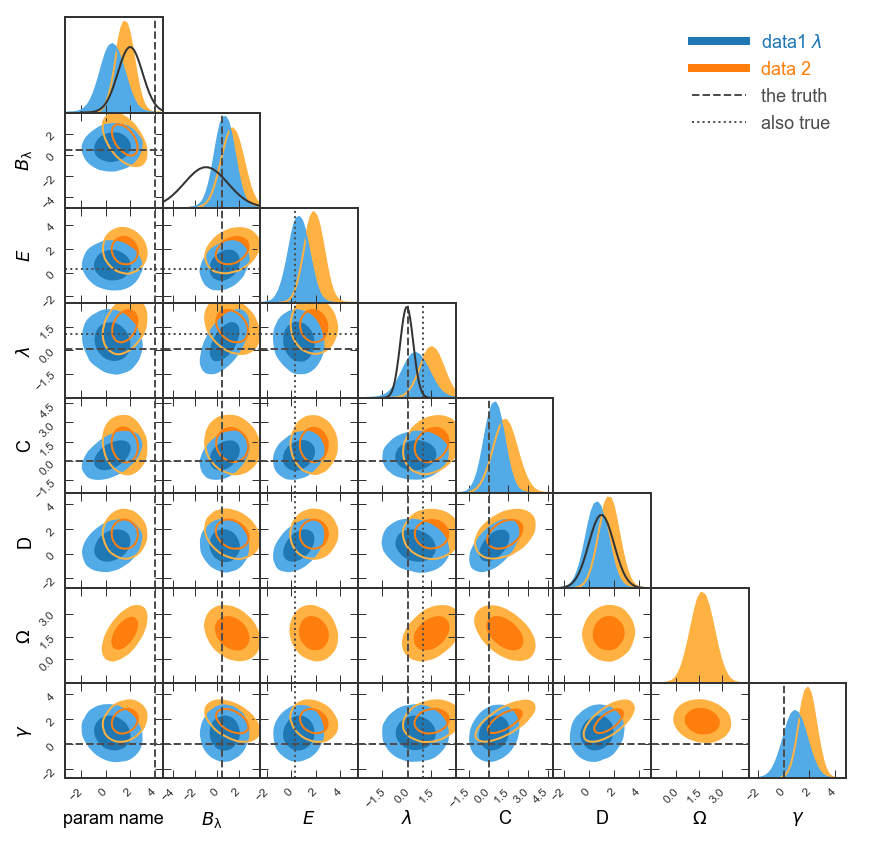

In [6]:
# List of parameter ranges to show,
# empty () or None to let pyGTC decide
paramRanges = (None,
               (-5,4),
               (),
               (-3,3),
               None,
               None,
               None,
               None)

# Do the magic
GTC = pygtc.plotGTC(chains=[samples1,samples2],
                    paramNames=names,
                    chainLabels=chainLabels,
                    truths=truths,
                    truthLabels=truthLabels,
                    priors=priors,
                    paramRanges=paramRanges,
                    figureSize='MNRAS_page',
                    plotName='fullGTC.pdf')

Single 2d panel
--------------
See how the covariance between C and D is a ground-breaking result? Let's look in more detail!
Here, we'll want single-column figures.

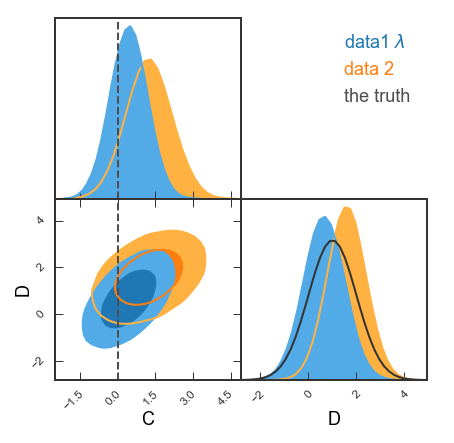

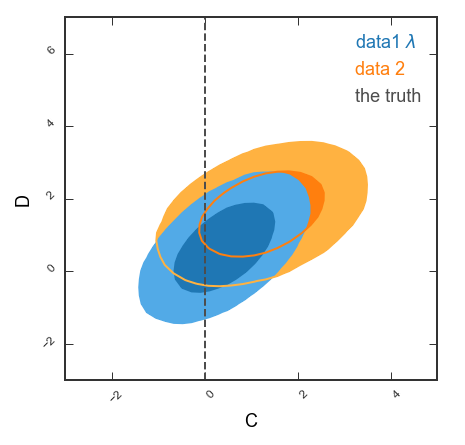

In [7]:
# Redefine priors and truths
priors2d = (None,(1,1))
truths2d = (0,None)

# The 2d panel and the 1d histograms
GTC = pygtc.plotGTC(chains=[samples1[:,4:6], samples2[:,4:6]],
                    paramNames=names[4:6],
                    chainLabels=chainLabels,
                    truths=truths2d,
                    truthLabels=truthLabels[0],
                    priors=priors2d,
                    figureSize='MNRAS_column')

# Only the 2d panel
Range2d = ((-3,5),(-3,7)) # To make sure there's enough space for the legend

GTC = pygtc.plotGTC(chains=[samples1[:,4:6],samples2[:,4:6]],
                    paramNames=names[4:6],
                    chainLabels=chainLabels,
                    truths=truths2d,
                    truthLabels=truthLabels[0],
                    priors=priors2d,
                    paramRanges=Range2d,
                    figureSize='MNRAS_column',
                    do1dPlots=False)

Single 1d panel
--------------
Finally, let's just plot the posterior on C

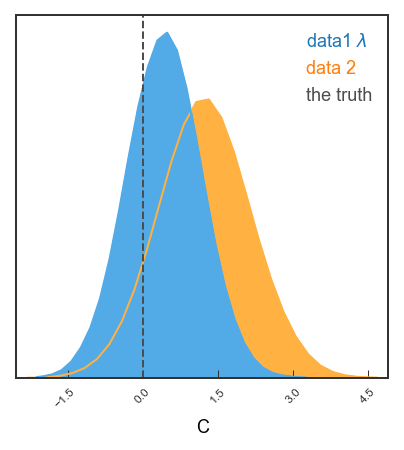

In [8]:
# Bit tricky, but remember each data set needs shape of (Npoints, nDim)
inputarr = [np.array([samples1[:,4]]).T,
            np.array([samples2[:,4]]).T]
truth1d = [0.]
GTC = pygtc.plotGTC(chains=inputarr,
                    paramNames=names[4],
                    chainLabels=chainLabels,
                    truths=truth1d,
                    truthLabels=truthLabels[0],
                    figureSize='MNRAS_column',
                    doOnly1dPlot=True)